In [1]:
import os
import random
from collections import defaultdict, Counter
from statistics import mode

import numpy as np
import pandas as pd
import nibabel
from matplotlib import colors
import matplotlib.style
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# import seaborn as sns
import matplotlib
%matplotlib inline
import numpy as np
from nilearn import datasets, plotting, image, surface
import nibabel as nib
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

from neurolang import frontend as fe

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'existential_predicate', 'universal_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


In [2]:
kam_labels_on_surface=[]

for i, component in enumerate(image.iter_img(
        'n_64_alpha_e3.nii')):
    print(i, component)
    kam_labels_on_surface.append(surface.vol_to_surf(component, '108525.R.pial.32k_fs_LR.surf.gii', interpolation='nearest'))

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.R.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


0 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0007505517
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/matrixlib/defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)


2 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0010291269
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

8 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0007014375
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

14 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.001258106
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

20 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.00067687186
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descri

26 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.000860199
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip 

32 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0007043715
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip

38 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.00091494643
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descri

44 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.00079273945
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descri

50 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0007056097
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip

56 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0008936282
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip

62 <class 'nibabel.nifti1.Nifti1Image'>
data shape (104, 123, 104)
affine: 
[[   1.875    0.       0.     -96.   ]
 [   0.       1.875    0.    -132.   ]
 [   0.       0.       1.875  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 104 123 104   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    1.875 1.875 1.875 1.    1.    1.    1.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0010501901
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip

In [3]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [4]:
kam_regions={}
surface = nib.load('108525.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
for i, darray in enumerate(kam_labels_on_surface):
    name = f'kamalakar_{i}.'
    points = vertices[darray.nonzero()]
    print(f"{name}: number of points {points.shape[0]}")
    if len(points)<=5:
        print('useless')
        continue
    kam_regions[name] = points
#     print(f"{name}: number of points {points.shape[0]}")
    

kamalakar_0.: number of points 698
kamalakar_1.: number of points 248
kamalakar_2.: number of points 440
kamalakar_3.: number of points 439
kamalakar_4.: number of points 794
kamalakar_5.: number of points 899
kamalakar_6.: number of points 1707
kamalakar_7.: number of points 888
kamalakar_8.: number of points 3
useless
kamalakar_9.: number of points 446
kamalakar_10.: number of points 229
kamalakar_11.: number of points 1858
kamalakar_12.: number of points 352
kamalakar_13.: number of points 634
kamalakar_14.: number of points 153
kamalakar_15.: number of points 665
kamalakar_16.: number of points 858
kamalakar_17.: number of points 389
kamalakar_18.: number of points 1370
kamalakar_19.: number of points 510
kamalakar_20.: number of points 5
useless
kamalakar_21.: number of points 915
kamalakar_22.: number of points 750
kamalakar_23.: number of points 633
kamalakar_24.: number of points 218
kamalakar_25.: number of points 1330
kamalakar_26.: number of points 1116
kamalakar_27.: number

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [5]:
surface = nib.load('108525.L.pial.32k_fs_LR.surf.gii')
vertices = surface.darrays[0].data
manual_sulci_gii = nib.load('108525_L_manual_segmentation.func.gii')
manual_sulci = dict()
for darray in manual_sulci_gii.darrays:
    name = darray.meta.metadata['Name']
    name = name[:name.rfind('_')]
    points = vertices[darray.data.nonzero()]
    manual_sulci[name] = points
    print(f"{name}: number of points {points.shape[0]}")

Hippocampal_sulcus: number of points 191
Superior_parietal_sulcus: number of points 48
Intraparietal_sulcus: number of points 246
Frontomarginal_sulcus: number of points 56
Middle_frontal_sulcus: number of points 187
Inferior_frontal_sulcus: number of points 228
Superior_frontal_sulcus: number of points 298
Intermediate_primus_of_Jensen: number of points 115
Retrocalcarine_sulcus: number of points 37
Lunate_sulcus: number of points 31
Lateral_occipital_sulcus: number of points 101
Superior_occipital_sulcus: number of points 131
Inferior_occipital_sulcus: number of points 131
Anterior_occipital_sulcus: number of points 205
Intralingual_sulcus: number of points 62
Collateral_sulcus: number of points 231
Occipitotemporal_sulcus: number of points 252
Orbital_H_shaped_sulcus: number of points 153
Olfactory_sulcus: number of points 120
Temporopolar_sulcus: number of points 49
Inferior_temporal_sulcus: number of points 124
Angular_sulcus: number of points 256
Superior_temporal_sulcus: number 

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108525_L_manual_segmentation.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


In [6]:
nl = fe.RegionFrontend()

for name, points in manual_sulci.items():
    ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
    region = fe.ExplicitVBR(
        ijk_points,
        destrieux_map.affine,
        img_dim=destrieux_map.shape
    )
    nl.add_region(region, result_symbol_name=f'manual_{name}')
    
for name, points in kam_regions.items():
    ijk_points = nib.affines.apply_affine(np.linalg.inv(destrieux_map.affine), points).astype(int)
    region = fe.ExplicitVBR(
        ijk_points,
        destrieux_map.affine,
        img_dim=destrieux_map.shape
    )
    nl.add_region(region, result_symbol_name=name)


### Visualisation of a sulcus

In [7]:
central_sulcus = nl.symbols.manual_Central_sulcus

plotting.view_img(
    central_sulcus.value.spatial_image(), title=central_sulcus.symbol_name,
    symmetric_map=False
)

/home/amachlou/.local/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


In [8]:
cmap = colors.ListedColormap(['red', 'blue', 'green', 'orange', 'purple'])
prims = [nl.symbols.manual_Central_sulcus.value.spatial_image(), nl.symbols.manual_Parieto_occipital_sulcus.value.spatial_image(), nl.symbols.manual_Callosal_sulcus.value.spatial_image(), nl.symbols.manual_Calcarine_sulcus.value.spatial_image(), nl.symbols.manual_Lateral_fissure.value.spatial_image()]

atlas_data = np.sum([(i+1) * mask.get_data() for (i, mask) in enumerate(prims)], axis=0)
print(set(atlas_data.ravel()))
atlas = image.new_img_like(prims[0], atlas_data)
plotting.view_img(atlas, symmetric_cmap=False, cmap=cmap, resampling_interpolation='nearest').resize(800, 800)

{0, 1, 2, 3, 4, 5}


/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


### Splitting surfaces into medial, lateral, ventral

In [9]:
Medial_surface = set()
Lateral_surface = set()
Ventral_surface = set()

for manual_sulcus_name in nl.region_names:
    if ('Callosal' in manual_sulcus_name
        or 'Parieto_occipital' in manual_sulcus_name
        or 'Cingulate' in manual_sulcus_name 
        or 'alcarine' in manual_sulcus_name 
        or 'Callosomarginal' in manual_sulcus_name
        or 'Paracingulate' in manual_sulcus_name
        or 'erior_rostral' in manual_sulcus_name
        or 'Paracentral' in manual_sulcus_name
        or 'Subparietal' in manual_sulcus_name
        or 'Cuneal' in manual_sulcus_name
        or 'Intralingual' in manual_sulcus_name
        or 'Intralimbic' in manual_sulcus_name
        or '2.' in manual_sulcus_name
        or '3.' in manual_sulcus_name
        or '4.' in manual_sulcus_name
        or '10.' in manual_sulcus_name
        or '13.' in manual_sulcus_name
        or '14.' in manual_sulcus_name
        or '16.' in manual_sulcus_name
        or '19.' in manual_sulcus_name
        or '21.' in manual_sulcus_name
        or '25.' in manual_sulcus_name
        or '27.' in manual_sulcus_name
        or '29.' in manual_sulcus_name
        or '30.' in manual_sulcus_name
        or '33.' in manual_sulcus_name
        or '34.' in manual_sulcus_name
        or '38.' in manual_sulcus_name
        or '42.' in manual_sulcus_name
        or '46.' in manual_sulcus_name
        or '48.' in manual_sulcus_name
        or '53.' in manual_sulcus_name
        or '59.' in manual_sulcus_name
        or '61.' in manual_sulcus_name
        or '63.' in manual_sulcus_name        
        or 'Medial_frontal' in manual_sulcus_name):
        Medial_surface.add(nl.symbols[manual_sulcus_name])
    elif ('Central' in manual_sulcus_name
        or 'ateral_fissure' in manual_sulcus_name
        or 'Precentral' in manual_sulcus_name
        or 'Postcentral' in manual_sulcus_name 
        or 'Superior_frontal' in manual_sulcus_name 
        or 'Inferior_frontal' in manual_sulcus_name
        or 'Middle_frontal' in manual_sulcus_name
        or 'Frontomarginal' in manual_sulcus_name
        or 'subcentral' in manual_sulcus_name
        or 'Intraparietal' in manual_sulcus_name
        or 'Intermediate_primus' in manual_sulcus_name
        or 'Superior_parietal' in manual_sulcus_name
        or 'Superior_occipital' in manual_sulcus_name
        or 'Inferior_occipital' in manual_sulcus_name 
        or 'Lateral_occipital' in manual_sulcus_name 
        or 'Lunate' in manual_sulcus_name
        or 'Superior_temporal' in manual_sulcus_name
        or 'Inferior_temporal' in manual_sulcus_name
        or 'Anterior_occipital' in manual_sulcus_name
        or 'Angular' in manual_sulcus_name
        or '0.' in manual_sulcus_name
        or '5.' in manual_sulcus_name
        or '6.' in manual_sulcus_name
        or '7.' in manual_sulcus_name
        or '9.' in manual_sulcus_name
        or '11.' in manual_sulcus_name
        or '15.' in manual_sulcus_name
        or '18.' in manual_sulcus_name
        or '22.' in manual_sulcus_name
        or '23.' in manual_sulcus_name
        or '26.' in manual_sulcus_name
        or '31.' in manual_sulcus_name
        or '32.' in manual_sulcus_name
        or '35.' in manual_sulcus_name
        or '36.' in manual_sulcus_name
        or '39.' in manual_sulcus_name
        or '41.' in manual_sulcus_name
        or '44.' in manual_sulcus_name
        or '45.' in manual_sulcus_name
        or '47.' in manual_sulcus_name
        or '50.' in manual_sulcus_name
        or '55.' in manual_sulcus_name
        or '57.' in manual_sulcus_name
        or '58.' in manual_sulcus_name
        or '60.' in manual_sulcus_name
        or '62.' in manual_sulcus_name
        or 'Medial_frontal' in manual_sulcus_name):
        Lateral_surface.add(nl.symbols[manual_sulcus_name])
    elif ('Occipitotemporal' in manual_sulcus_name
        or 'Collateral' in manual_sulcus_name
        or 'Rhinal' in manual_sulcus_name 
        or 'Parahippocampal' in manual_sulcus_name 
        or 'Hippocampal' in manual_sulcus_name
        or 'Olfactory' in manual_sulcus_name
        or 'Temporopolar' in manual_sulcus_name
        or '1' in manual_sulcus_name
        or '28' in manual_sulcus_name
        or '54' in manual_sulcus_name
        or 'Orbital' in manual_sulcus_name):
        Ventral_surface.add(nl.symbols[manual_sulcus_name])
    else:
        print(manual_sulcus_name)

        

lateral_surface = nl.add_region_set(Lateral_surface, name='lateral_surface')
medial_surface = nl.add_region_set(Medial_surface, name='medial_surface')
ventral_surface = nl.add_region_set(Ventral_surface, name='ventral_surface')

### Implementing STAR geometry for characterising trajectory of sulci

In [10]:
star_lines = [
    {
        'y': [0.5, 0.5],
        'z': [0, 1],
        'interval': [3 / 2.0, 2]
    },
    {
        'y': [0, 1],
        'z': [0, 1],
        'interval': [0.5, 3 / 2.0]
    },
    {
        'y': [0, 1],
        'z': [0.5, 0.5],
        'interval': [-0.5, 0.5]
    },
    {
        'y': [0, 1],
        'z': [1, 0],
        'interval': [-3/2.0, -0.5]
    },
]

In [11]:
AI_PS_sulci = set()
Vertical_sulci = set()
PI_AS_sulci = set()
Longitudinal_sulci = set()

In [12]:
def plot_single_sulcus(sulcus_name):
    data = manual_sulci[sulcus_name]
    # only take (y, z) coordinates of sulcus
    data = data[:, 1:]
    data = MinMaxScaler().fit_transform(data)
    y = data[:, 0].reshape(-1, 1)
    z = data[:, 1].reshape(-1, 1)
    lr = LinearRegression().fit(y, z)
    f = lambda u: lr.intercept_ + lr.coef_[0] * u
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    yplot = np.linspace(0, 1)
    for s in star_lines:
        is_the_line = (
            lr.coef_[0] >= s['interval'][0] and
            lr.coef_[0] <= s['interval'][1]
        )
        lw = 2.0 if is_the_line else 1.0
        ls = '-' if is_the_line else '--'
        c = 'b' if is_the_line else 'k'
        ax.plot(s['y'], s['z'], c=c, ls=ls, lw=lw)
    ax.add_artist(
        plt.Circle((0.5, 0.5),
                   0.3,
                   color='k',
                   ls='dashed',
                   fill=False,
                   linewidth=1.0)
    )
    y_coef = lr.coef_[0]
#         if -0.5 > y_coef > -2:
#             print('AI/PS')
#         elif -2 > y_coef > 2:
#             print('Vertical')
#         elif 2 > y_coef > 0.5:
#             print('AS/PI')
#         elif 0.5 > y_coef > -0.5:
#             print('Longitudinal')
    ax.scatter(y, z, marker='.')
    ax.plot(
        yplot,
        f(yplot),
        c='r',
        label='linear_regression: z = {} + {} y'.format(
            lr.intercept_, lr.coef_[0]
        )
    )
    y_coef = lr.coef_[0]
#     print(y_coef)
    for sulc in nl.region_names:
        if sulcus_name in sulc:
            if -0.5 > y_coef > -2:
#                 print('AI/PS')
                AI_PS_sulci.add(nl.symbols[sulc])
            elif -2 > y_coef > 2:
#                 print('Vertical')
                Vertical_sulci.add(nl.symbols[sulc])
            elif 2 > y_coef > 0.5:
#                 print('AS/PI')
                PI_AS_sulci.add(nl.symbols[sulc])
            elif 0.5 > y_coef > -0.5:
#                 print('Longitudinal')
                Longitudinal_sulci.add(nl.symbols[sulc])

    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_title(f'{sulcus_name} PCA main direction')
    ax.legend()
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

In [13]:
# for sulcus_name in manual_sulci.keys():
#     plot_single_sulcus(sulcus_name)

In [14]:
anteroinf_posterosup = nl.add_region_set(AI_PS_sulci, name='anteroinf_posterosup')
vertical = nl.add_region_set(Vertical_sulci, name='vertical')
posteroinf_anterosup = nl.add_region_set(PI_AS_sulci, name='posteroinf_anterosup')
longitudinal = nl.add_region_set(Longitudinal_sulci, name='longitudinal')

### Dominant sulcal relationships relative to the CS, on the y-axis

In [15]:
def tolerance_y_3(ys_origin_sulcus, ys_target_sulcus, length):
    # we consider I the origin
    before=set()
    overlaps=set()
    during=set()
    meets=set()
    starts=set()
    finishes=set()
    equals=set()
    after=set()
    Anterior_of=set()
    Posterior_of=set()
    During=set()
    J_minus = min(ys_target_sulcus)
    J_plus = max(ys_target_sulcus) + length
    
    I_boxes = set(ys_origin_sulcus)
    for x in I_boxes:
        I_minus = x
        I_plus = I_minus + length
        
        if I_minus < I_plus < J_minus < J_plus:
            before.add(x)
        if I_minus < J_minus < I_plus < J_plus:
            overlaps.add(x)
        if J_minus < I_minus < I_plus < J_plus:
            during.add(x)
        if I_minus < I_plus == J_minus < J_plus:
            meets.add(x)
        if I_minus == J_minus < I_plus < J_plus:
            starts.add(x)
        if J_minus < I_minus < I_plus == J_plus:
            finishes.add(x)
        if I_minus == J_minus < I_plus == J_plus:
            equals.add(x)
        if J_minus < J_plus < I_minus < I_plus:
            after.add(x)
    before_pc =  len(before) / len(I_boxes) * 100
    overlaps_pc =  len(overlaps) / len(I_boxes) * 100
    during_pc = len(during) / len(I_boxes) * 100
    meets_pc = len(meets) / len(I_boxes) * 100
    starts_pc = len(starts) / len(I_boxes) * 100
    finishes_pc = len(finishes) / len(I_boxes) * 100
    equals_pc = len(equals) / len(I_boxes) * 100
    after_pc = len(after) / len(I_boxes) * 100     

#     x = np.arange(8)
#     plt.bar(x, height= [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc])
#     plt.xticks(x+.5, ['before','overlaps','during','meets','starts','finishes','equals','after'])
#     plt.axhline(y=80, color='r', linestyle='--')
#     plt.show()
    values = [before_pc, overlaps_pc, during_pc, meets_pc, starts_pc, finishes_pc, equals_pc, after_pc]
    
    return values

In [16]:
y_labels =  ['anterior', 'overlaps', 'during_y', 'meets', 'starts', 'finishes', 'equals', 'posterior']
z_labels = ['superior', 'overlaps', 'during_z', 'meets', 'starts', 'finishes', 'equals', 'inferior']

In [17]:
def making_dominant_sets_relative_to_primary(primary_sulcus, labels, subject_manual_sulci, subject_manual_regions, axis):
    
    x = nl.new_region_symbol('x')
    q = nl.query(
        x, 
        (
            nl.symbols.anterior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.posterior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.superior_of(x, nl.symbols[f'manual_{primary_sulcus}']) |
            nl.symbols.inferior_of(x, nl.symbols[f'manual_{primary_sulcus}']) 
        )
    )

    res = q.do()

    anterior=set()
    posterior=set()
    during_y=set()
    superior=set()
    inferior=set()
    during_z=set()

    for r in res:
        if 'sulcus' in r.symbol_name or 'primus' in r.symbol_name or 'fissure' in r.symbol_name:
#             print(r.symbol_name[7:])
            sulcus_relativity = tolerance_y_3(subject_manual_sulci[primary_sulcus].T[axis], subject_manual_sulci[r.symbol_name[7:]].T[axis], length=.1)
            relations=[]
            relations.append(labels[np.argmax(np.array(sulcus_relativity))])
            keys, counts = np.unique(relations, return_counts=True)
#             plt.bar(keys, counts)
#             print (r.symbol_name[7:], ' is ', mode(relations), primary_sulcus, '\n')
            if mode(relations)=='anterior':
                anterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='posterior':
                posterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_y':
                during_y.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='superior':
                superior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='inferior':
                inferior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_z':
                during_z.add(nl.symbols[r.symbol_name])
        if 'kamalakar' in r.symbol_name:
#             print(r.symbol_name)
            sulcus_relativity = tolerance_y_3(subject_manual_sulci[primary_sulcus].T[axis], subject_manual_regions[r.symbol_name].T[axis], length=.1)
            relations=[]
            relations.append(labels[np.argmax(np.array(sulcus_relativity))])
            keys, counts = np.unique(relations, return_counts=True)
#             plt.bar(keys, counts)
#             print (r.symbol_name, ' is ', mode(relations), primary_sulcus, '\n')
            if mode(relations)=='anterior':
                anterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='posterior':
                posterior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_y':
                during_y.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='superior':
                superior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='inferior':
                inferior.add(nl.symbols[r.symbol_name])
            elif mode(relations)=='during_z':
                during_z.add(nl.symbols[r.symbol_name])
        if axis==1:
            anterior_dominant = nl.add_region_set(anterior, name=f'{primary_sulcus}_anterior_dominant')
            posterior_dominant = nl.add_region_set(posterior, name=f'{primary_sulcus}_posterior_dominant')
            during_y_dominant = nl.add_region_set(during_y, name=f'{primary_sulcus}_during_y_dominant')
        elif axis==2:
            superior_dominant = nl.add_region_set(superior, name=f'{primary_sulcus}_superior_dominant')
            inferior_dominant = nl.add_region_set(inferior, name=f'{primary_sulcus}_inferior_dominant')
            during_z_dominant = nl.add_region_set(during_z, name=f'{primary_sulcus}_during_z_dominant')

In [18]:
cs_y_relations = making_dominant_sets_relative_to_primary('Central_sulcus', y_labels, manual_sulci, kam_regions, axis=1)
cs_z_relations = making_dominant_sets_relative_to_primary('Central_sulcus', z_labels, manual_sulci, kam_regions, axis=2)
lf_y_relations = making_dominant_sets_relative_to_primary('Lateral_fissure', y_labels, manual_sulci, kam_regions, axis=1)
lf_z_relations = making_dominant_sets_relative_to_primary('Lateral_fissure', z_labels, manual_sulci, kam_regions, axis=2)
pos_y_relations = making_dominant_sets_relative_to_primary('Parieto_occipital_sulcus', y_labels, manual_sulci, kam_regions, axis=1)
pos_z_relations = making_dominant_sets_relative_to_primary('Parieto_occipital_sulcus', z_labels, manual_sulci, kam_regions, axis=2)
call_y_relations = making_dominant_sets_relative_to_primary('Callosal_sulcus', y_labels, manual_sulci, kam_regions, axis=1)
call_z_relations = making_dominant_sets_relative_to_primary('Callosal_sulcus', z_labels, manual_sulci, kam_regions, axis=2)
calc_y_relations = making_dominant_sets_relative_to_primary('Calcarine_sulcus', y_labels, manual_sulci, kam_regions, axis=1)
calc_z_relations = making_dominant_sets_relative_to_primary('Calcarine_sulcus', z_labels, manual_sulci, kam_regions, axis=2)

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


### Queries

#### Dorsolateral prefrontal cortex (kamalakar_0)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


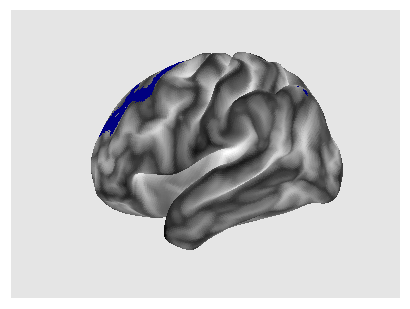

In [19]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[0],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [20]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.isin(x, nl.symbols.Central_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_during_y_dominant) &
        ~nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Anterior_vertical_ramus_lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_during_y_dominant) &
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_superior_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_0.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


900f7a52-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_0.']
FOUND and  0  others


#### Posterior cingulate cortex (kamalakar_3)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


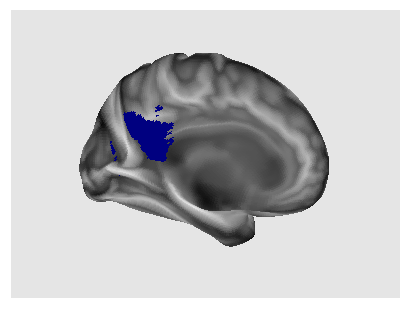

In [21]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[3],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='medial');

In [22]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.isin(x, nl.symbols.Central_sulcus_during_y_dominant) &
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_during_y_dominant) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_3.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

955ced00-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_3.', 'kamalakar_52.', 'kamalakar_21.', 'kamalakar_22.']
FOUND and  3  others


#### Broca's area (kamalakar_5)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


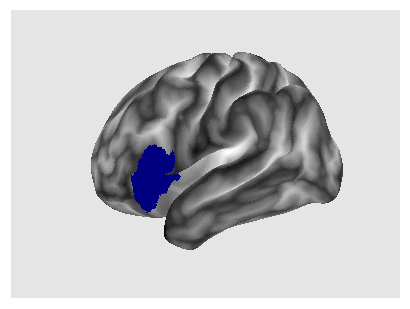

In [23]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[5],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [24]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Central_sulcus) &
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_inferior_dominant) &
        ~nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_5.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9aa1e27a-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_5.', 'manual_Anterior_vertical_ramus_lateral_fissure', 'manual_Inferior_frontal_sulcus']
FOUND and  2  others


#### Superior temporal gyrus (kamalakar_6)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


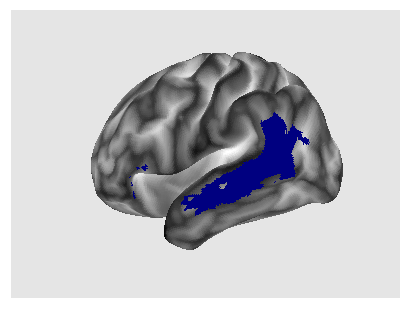

In [25]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[6],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [26]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_y_dominant) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_inferior_dominant) &
        ~nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_6.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


9fabe536-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_6.']
FOUND and  0  others


#### Primary auditory area / Heschl's gyrus (kamalakar_7)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


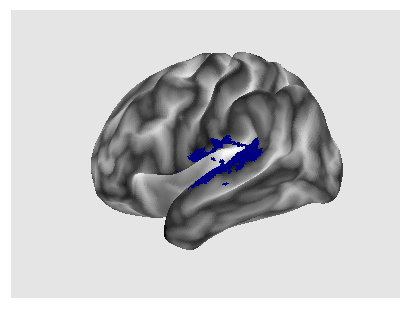

In [27]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[7],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [28]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_y_dominant) &
        nl.symbols.isin(x, nl.symbols.Parieto_occipital_sulcus_during_z_dominant) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.manual_Anterior_vertical_ramus_lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Central_sulcus_inferior_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_7.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


a4cda324-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_7.']
FOUND and  0  others


#### Fusiform / Inferior occipital gyrus (kamalakar_15)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


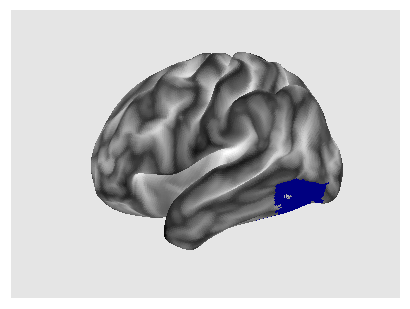

In [29]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[15],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [30]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.manual_Lateral_fissure) &
        nl.symbols.isin(x, nl.symbols.Calcarine_sulcus_during_y_dominant) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_15' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


aa1d2c1e-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_15.', 'manual_Inferior_occipital_sulcus']
FOUND and  1  others


#### Frontopolar / Superior rostral gyrus area (kamalakar_29)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


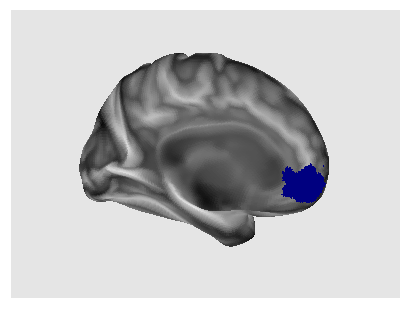

In [31]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[29],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='medial');

In [32]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.manual_Anterior_horizontal_ramus_lateral_fissure) &
        nl.symbols.isin(x, medial_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_29' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


af0ae126-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_29.']
FOUND and  0  others


#### Supramarginal gyrus (kamalakar_36)

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.R.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


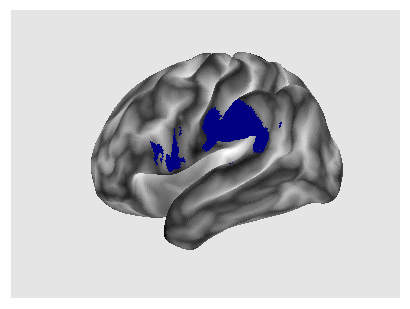

In [33]:
plotting.surf_plotting.plot_surf_roi('107321.L.inflated.32k_fs_LR.surf.gii', kam_labels_on_surface[36],
                                     bg_map='107321.R.sulc.32k_fs_LR.shape.gii', view='lateral');

In [34]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.isin(x, nl.symbols.Lateral_fissure_during_y_dominant) &
        ~nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Parieto_occipital_sulcus) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_during_z_dominant) &
        nl.symbols.isin(x, nl.symbols.Callosal_sulcus_during_y_dominant) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.manual_Calcarine_sulcus) &
        nl.symbols.isin(x, lateral_surface)
    )
)

res = q.do()
print(res)

for r in res:
    if '_36.' in r.symbol_name:
        print('FOUND and ', (len(res)-1), ' others')

/home/amachlou/git/neurolang/neurolang/regions.py:218: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  np.all(self.voxels == other.voxels))


b3acab74-7330-11e9-9a5e-2016b9657ea3: typing.AbstractSet[neurolang.regions.Region] = ['kamalakar_36.']
FOUND and  0  others
